In [16]:
!pip install --upgrade multion -q

In [ ]:
import multion


In [ ]:
multion.login()

Logged in.


In [ ]:
response = multion.set_remote(False)
response

False

In [24]:
response = multion.new_session({"input": "what is the weather today","url": "https://www.google.com"})
print(response['message'])
session_id = response['session_id']
session_id

running new session


In [ ]:
response = multion.update_session(session_id, {"input": "what is the weather today","url": "https://www.google.com"})
response['message']

session updated


'The weather today in Palo Alto, CA is partly cloudy with a high of 63°F and a low of 49°F. There is a 6% chance of precipitation, and the wind is coming from the north at 6 mph.\n\n'

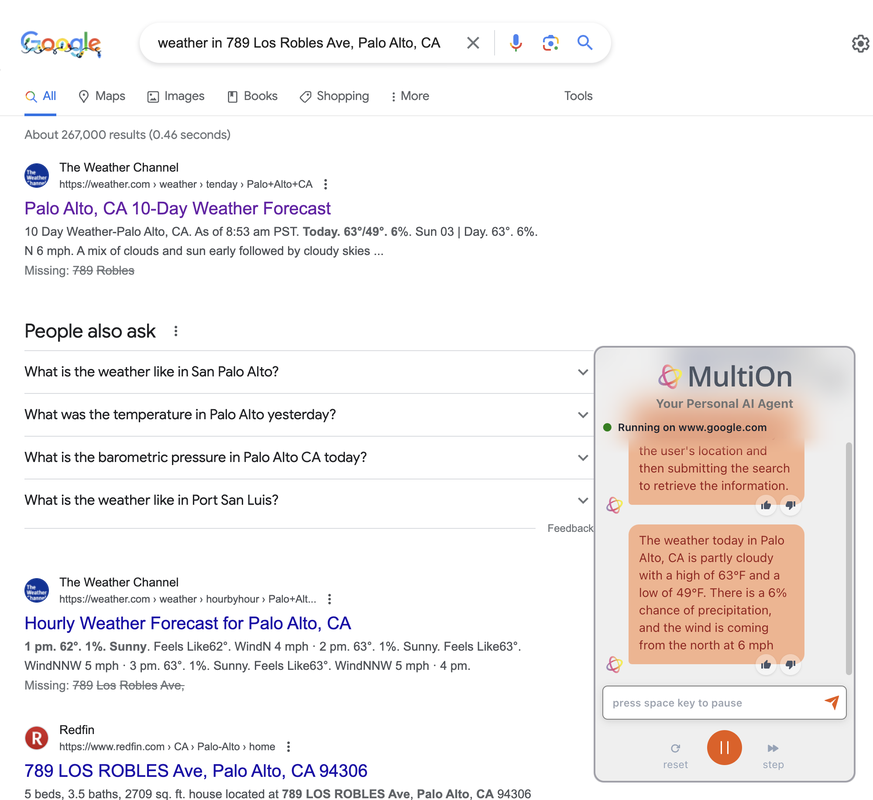

In [ ]:
multion.get_screenshot(response, height=800)

In [ ]:
multion.close_session(session_id)

ERROR: 'response'


: 